<a href="https://colab.research.google.com/github/brendaparnin/DA-6813-001-Fall-2021-Data-Analytics-Applications/blob/main/HR_Analytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install scikit-learn==0.18 --force-reinstall

In [2]:
#pip install heatmapz

In [3]:
#pip install pingouin

In [4]:
#Data Maneuvering
import pandas as pd
import numpy as np
import csv

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb
from heatmap import heatmap, corrplot

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import roc_curve

#Get Rid of Warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


## **Read in Data**

In [5]:
data = pd.read_csv('general_data.csv', sep =',', header=[0])
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [6]:
print(data.shape, "\n\n")

(4410, 29) 





## **Print the shape of the data**
> 4410 rows

> 29 columns

Column Names



1. Age	
2. Attrition	
3. Business Travel	
4. Department	
5. Distance From Home	
6. Education	
7. Education Field
8. Employee Count
9. Employee ID	
10. Gender	
11. Job Level	
12. Job Role	
13. Marital Status	
14. Monthly Income	
15. Num Companies Worked	
16. Over18
17. Percent Salary Hike	
18. Standard Hours	
19. Stock Option Level	
20. Total Working Years	
21. Training Times Last Year	
22. Years At Company	
23. Years Since Last Promotion	
24. Years With Curr Manager	
25. Environment Satisfaction	
26. Job Satisfaction	
27. Work Life Balance	
28. Job Involvement	
29. Performance Rating



In [7]:
print(data.shape, "\n\n")

(4410, 29) 




## **View `Attrition` balance**

No     3699
Yes     711
Name: Attrition, dtype: int64

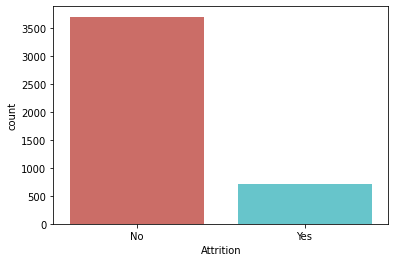

In [8]:
hr_df = pd.DataFrame(data)

sb.countplot(x='Attrition', data=data, palette='hls')

hr_df['Attrition'].value_counts()

## **List Columns with Null Values**

In [9]:
data.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

## **Remove Null Values**

In [10]:
data = data.dropna()  #Remove records with NULL values
data.isnull().sum(axis=0)  #Verify NULL values are removed from dataset 

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

## **Drop Duplicate Data**

In [11]:
data = data.drop_duplicates()

## **Reshape**

In [12]:
data.shape

(4300, 29)

Print the shape of the cleaned data
> 4300 rows - removed 110 columns

> 27 columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

## **Create Boxblox to show Outliers**


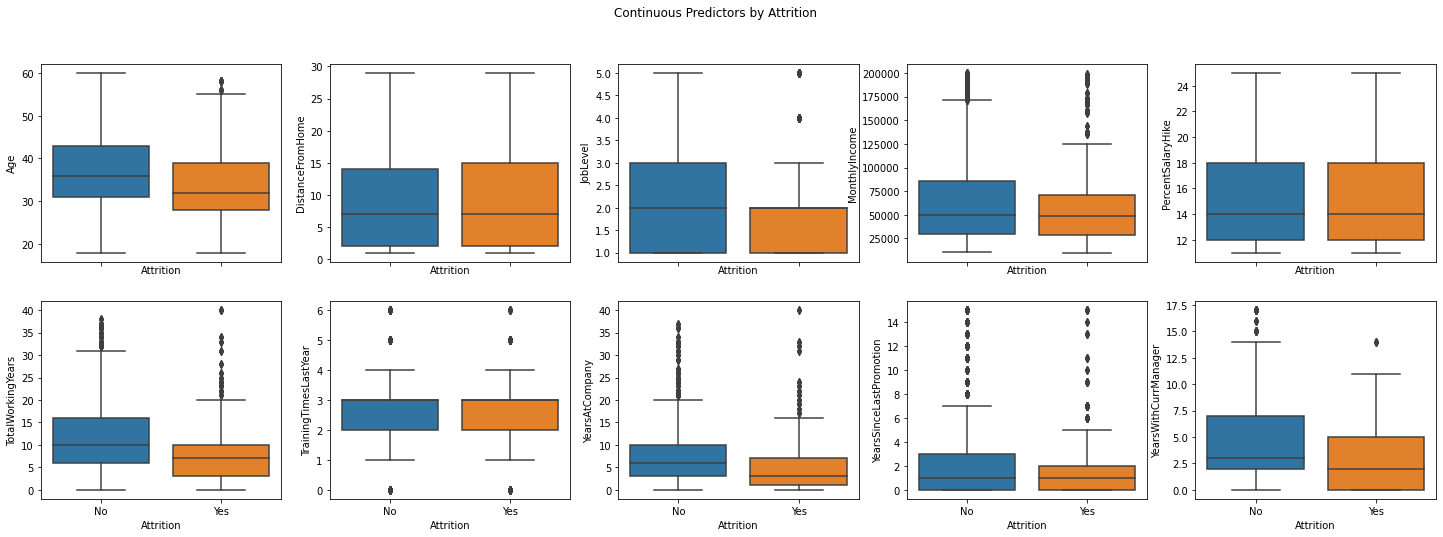

In [14]:
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(25,8))

fig.suptitle('Continuous Predictors by Attrition')

sb.boxplot(ax=axes[0, 0], data=data, x='Attrition', y='Age')
sb.boxplot(ax=axes[0, 1], data=data, x='Attrition', y='DistanceFromHome')
sb.boxplot(ax=axes[0, 2], data=data, x='Attrition', y='JobLevel')
sb.boxplot(ax=axes[0, 3], data=data, x='Attrition', y='MonthlyIncome')
sb.boxplot(ax=axes[0, 4], data=data, x='Attrition', y='PercentSalaryHike')
sb.boxplot(ax=axes[1, 0], data=data, x='Attrition', y='TotalWorkingYears')
sb.boxplot(ax=axes[1, 1], data=data, x='Attrition', y='TrainingTimesLastYear')
sb.boxplot(ax=axes[1, 2], data=data, x='Attrition', y='YearsAtCompany')
sb.boxplot(ax=axes[1, 3], data=data, x='Attrition', y='YearsSinceLastPromotion')
sb.boxplot(ax=axes[1, 4], data=data, x='Attrition', y='YearsWithCurrManager')

## **View Variable Correlations**

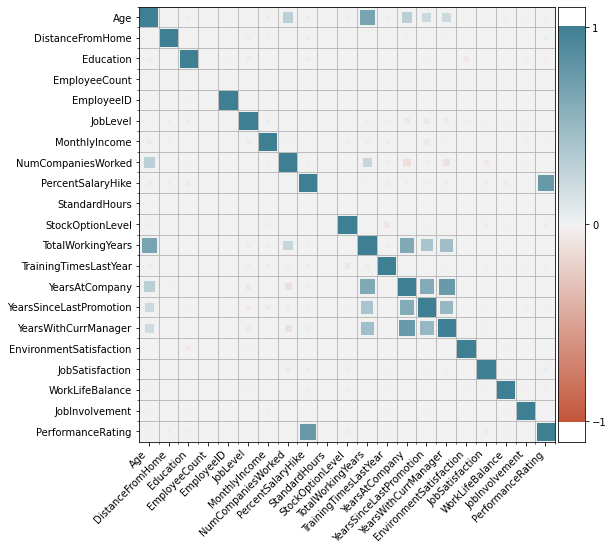

In [15]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300)

In [16]:
data['Gender'].replace(0, 'Female',inplace=True)
data['Gender'].replace(1, 'Male',inplace=True)
data['Attrition'].replace(0, 'No',inplace=True)
data['Attrition'].replace(1, 'Yes',inplace=True)


gender_attrition = data.groupby(["Attrition","Gender"])[["Gender"]].count().rename(columns={"Gender":"Count"})
gender_attrition

Count
Attrition Gender       
No        Female   1464
          Male     2141
Yes       Female    265
          Male      430

In [17]:
#data['Gender'].replace(0, 'Female',inplace=True)
#data['Gender'].replace(1, 'Male',inplace=True)
data['Attrition'].replace(0, 'No',inplace=True)
data['Attrition'].replace(1, 'Yes',inplace=True)


numcompworked_attrition = data.groupby(["Attrition","NumCompaniesWorked"])[["NumCompaniesWorked"]].count().rename(columns={"NumCompaniesWorked":"Count"})
numcompworked_attrition

Count
Attrition NumCompaniesWorked       
No        0.0                   503
          1.0                  1246
          2.0                   380
          3.0                   418
          4.0                   355
          5.0                   140
          6.0                   156
          7.0                   166
          8.0                   123
          9.0                   118
Yes       0.0                    67
          1.0                   289
          2.0                    47
          3.0                    48
          4.0                    49
          5.0                    45
          6.0                    45
          7.0                    51
          8.0                    18
          9.0                    36

In [18]:
#data['Gender'].replace(0, 'Female',inplace=True)
#data['Gender'].replace(1, 'Male',inplace=True)
data['Attrition'].replace(0, 'No',inplace=True)
data['Attrition'].replace(1, 'Yes',inplace=True)


JobSatisfaction_attrition = data.groupby(["Attrition","JobSatisfaction"])[["JobSatisfaction"]].count().rename(columns={"JobSatisfaction":"Count"})
JobSatisfaction_attrition

Count
Attrition JobSatisfaction       
No        1.0                653
          2.0                688
          3.0               1082
          4.0               1182
Yes       1.0                194
          2.0                135
          3.0                214
          4.0                152

In [19]:
data['Attrition'].replace(0, 'No',inplace=True)
data['Attrition'].replace(1, 'Yes',inplace=True)


WorkLifeBalance_attrition = data.groupby(["Attrition","WorkLifeBalance"])[["WorkLifeBalance"]].count().rename(columns={"WorkLifeBalance":"Count"})
WorkLifeBalance_attrition

Count
Attrition WorkLifeBalance       
No        1.0                163
          2.0                838
          3.0               2234
          4.0                370
Yes       1.0                 73
          2.0                167
          3.0                375
          4.0                 80

In [20]:
data['Attrition'].replace(0, 'No',inplace=True)
data['Attrition'].replace(1, 'Yes',inplace=True)


EnvironmentSatisfaction_attrition = data.groupby(["Attrition","EnvironmentSatisfaction"])[["EnvironmentSatisfaction"]].count().rename(columns={"EnvironmentSatisfaction":"Count"})
EnvironmentSatisfaction_attrition

Count
Attrition EnvironmentSatisfaction       
No        1.0                        619
          2.0                        713
          3.0                       1138
          4.0                       1135
Yes       1.0                        211
          2.0                        126
          3.0                        181
          4.0                        177

### **Additional Data Exploration Numerical Predictor Histograms**

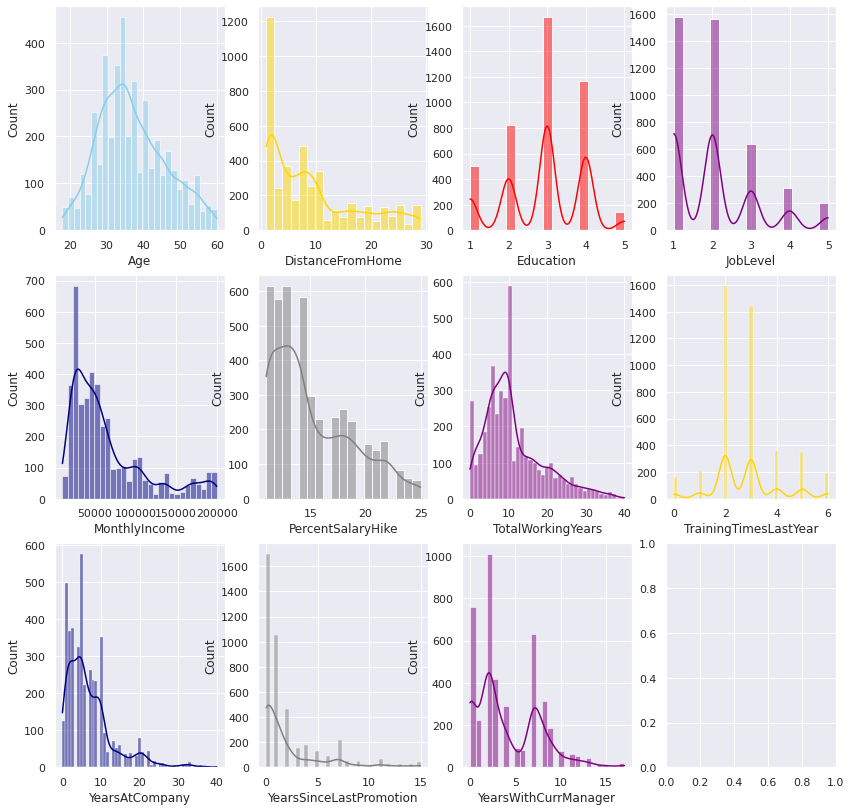

In [21]:
#Add Additional Data Exploration Charts
sb.set(style="darkgrid")
fig, axs = plt.subplots(3,4, figsize=(14, 14))

data_subset = data[['Age', 'DistanceFromHome', 'Education', 'JobLevel' ,'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
sb.histplot(data_subset, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data_subset, x="DistanceFromHome", kde=True, color="gold", ax=axs[0, 1])
sb.histplot(data_subset, x="Education", kde=True, color="red", ax=axs[0, 2])
sb.histplot(data_subset, x="JobLevel", kde=True, color="purple", ax=axs[0, 3])
sb.histplot(data_subset, x="MonthlyIncome", kde=True, color="navy", ax=axs[1, 0])
sb.histplot(data_subset, x="PercentSalaryHike", kde=True, color="grey", ax=axs[1, 1])
sb.histplot(data_subset, x="TotalWorkingYears", kde=True, color="purple", ax=axs[1, 2])
sb.histplot(data_subset, x="TrainingTimesLastYear", kde=True, color="gold", ax=axs[1, 3])
sb.histplot(data_subset, x="YearsAtCompany", kde=True, color="navy", ax=axs[2, 0])
sb.histplot(data_subset, x="YearsSinceLastPromotion", kde=True, color="grey", ax=axs[2, 1])
sb.histplot(data_subset, x="YearsWithCurrManager", kde=True, color="purple", ax=axs[2, 2])


plt.show()

## **Dropping columns `EmployeeCount`, `Over18`, and `StandardHours` not needed for Model Creation**

In [22]:
data = data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## **Change `Attrition` to binary**

In [23]:
data['Attrition']= pd.Series(np.where(data.Attrition.values == 'Yes', 1, 0),
          data.index)
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## **Feature Engineering**

In [24]:
BusinessTravel = pd.get_dummies(data['BusinessTravel'],drop_first=True)
Department = pd.get_dummies(data['Department'],drop_first=True)
Education = pd.get_dummies(data['Education'],drop_first=True)
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)
Gender = pd.get_dummies(data['Gender'],drop_first=True)
JobRole = pd.get_dummies(data['JobRole'],drop_first=True)
MaritalStatus = pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [25]:
data.drop(['BusinessTravel','Department','Education','EducationField','Gender','JobRole', 'MaritalStatus' ],axis=1,inplace=True)

In [26]:
data = pd.concat([data,BusinessTravel,Department,Education,EducationField,Gender,JobRole, MaritalStatus],axis=1)

In [27]:
data.head()

,Age,Attrition,DistanceFromHome,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Travel_Frequently,Travel_Rarely,Research & Development,Sales,2,3,4,5,Life Sciences,Marketing,Medical,Other,Technical Degree,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,51,0,6,1,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,2,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,3,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,0,2,4,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,0,10,5,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


## **Handle Unblanced Data**

In [28]:
train_features = data.drop(["Attrition","EmployeeID", "Age", "TotalWorkingYears", "PercentSalaryHike","PerformanceRating"],axis=1)
train_label = data['Attrition']

In [29]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(train_features, train_label)

print('original dataset shape:', Counter(train_label))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 3605, 1: 695})
Resample dataset shape Counter({0: 695, 1: 695})


## **Split Data**


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=42)

#Print out Shapes
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (3440, 37)
y_train Shape:  (3440,)
X_test Shape:  (860, 37)
y_test Shape:  (860,)


## **Feature Scaling**

In [31]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Logistic Regression**

In [32]:
LogReg = LogisticRegression(solver="liblinear")
LogReg.fit(X_train, y_train)

log_pred = LogReg.predict(X_test)

In [33]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       717
           1       0.64      0.10      0.17       143

    accuracy                           0.84       860
   macro avg       0.74      0.54      0.54       860
weighted avg       0.81      0.84      0.79       860



<Figure size 288x288 with 0 Axes>

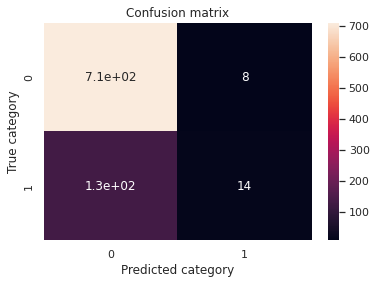

In [34]:
log_cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize = (4,4))
fig, ax = plt.subplots(1)
ax = sb.heatmap(log_cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

## **KNN** 

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [36]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       717
           1       0.74      0.72      0.73       143

    accuracy                           0.91       860
   macro avg       0.84      0.83      0.84       860
weighted avg       0.91      0.91      0.91       860



<Figure size 288x288 with 0 Axes>

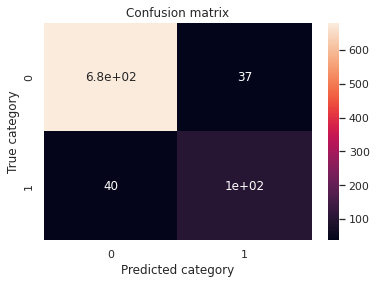

In [37]:
knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize = (4,4))
fig, ax = plt.subplots(1)
ax = sb.heatmap(knn_cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

## **LinearSVC**

In [38]:
svc = LinearSVC()
svc_model = CalibratedClassifierCV(svc)

svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [39]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       717
           1       0.57      0.06      0.10       143

    accuracy                           0.84       860
   macro avg       0.71      0.52      0.51       860
weighted avg       0.80      0.84      0.78       860



<Figure size 288x288 with 0 Axes>

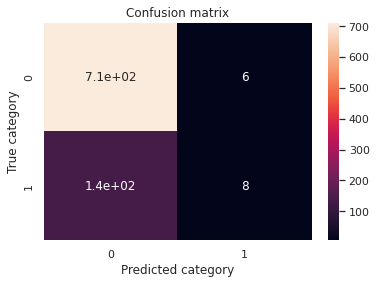

In [40]:
svc_cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize = (4,4))
fig, ax = plt.subplots(1)
ax = sb.heatmap(svc_cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

In [41]:
#pip install dominance-analysis

In [42]:
data_final = data.drop(columns=["EmployeeID", "Age", "TotalWorkingYears", "PercentSalaryHike","PerformanceRating"])
data_final.head()

,Attrition,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Travel_Frequently,Travel_Rarely,Research & Development,Sales,2,3,4,5,Life Sciences,Marketing,Medical,Other,Technical Degree,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,0,6,1,131160,1.0,0,6,1,0,0,3.0,4.0,2.0,3,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,10,1,41890,0.0,1,3,5,1,4,3.0,2.0,4.0,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,17,4,193280,1.0,3,2,5,0,3,2.0,2.0,1.0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,0,2,3,83210,3.0,3,5,8,7,5,4.0,4.0,3.0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0,10,1,23420,4.0,2,2,6,0,4,4.0,1.0,3.0,3,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [43]:
from dominance_analysis import Dominance_Datasets
from dominance_analysis import Dominance

dominance_classification=Dominance(data=data_final,target='Attrition',objective=0,pseudo_r2="mcfadden")

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['MonthlyIncome', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Travel_Frequently', 2, 'Technical Degree', 'Manufacturing Director', 'Research Director', 'Married', 'Single']

********************  Pseudo R-Squared of Complete Model :  ********************

MacFadden's R-Squared : 0.12385508787827326 

